In [3]:
# !pip3 install folium

In [1]:
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
import seaborn as sns
import folium
from folium import plugins

In [210]:
df0 = pd.read_csv('202007-citibike-tripdata.csv')

In [211]:
df1 = df0[df0['starttime'].str.contains('2020-07-01')]

In [215]:
df = df1

In [216]:
len(df)

63406

In [217]:
df['starttime'] = df['starttime'].apply(lambda x: x[:-1].replace(' ','T'))

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  """Entry point for launching an IPython kernel.


In [218]:
df['stoptime'] = df['stoptime'].apply(lambda x: x[:-1].replace(' ','T'))

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  """Entry point for launching an IPython kernel.


In [219]:
df.head()

,tripduration,starttime,stoptime,start station id,start station name,start station latitude,start station longitude,end station id,end station name,end station latitude,end station longitude,bikeid,usertype,birth year,gender
0,341,2020-07-01T00:00:01.302,2020-07-01T00:05:42.565,3463,E 16 St & Irving Pl,40.735367,-73.987974,2003,1 Ave & E 18 St,40.733812,-73.980544,33861,Subscriber,1986,1
1,321,2020-07-01T00:00:01.362,2020-07-01T00:05:22.949,3463,E 16 St & Irving Pl,40.735367,-73.987974,2003,1 Ave & E 18 St,40.733812,-73.980544,31233,Subscriber,1990,2
2,2710,2020-07-01T00:00:06.629,2020-07-01T00:45:17.341,426,West St & Chambers St,40.717548,-74.013221,212,W 16 St & The High Line,40.743349,-74.006818,40329,Customer,1969,0
3,2685,2020-07-01T00:00:13.022,2020-07-01T00:44:58.864,426,West St & Chambers St,40.717548,-74.013221,212,W 16 St & The High Line,40.743349,-74.006818,17567,Subscriber,1998,1
4,191,2020-07-01T00:00:13.466,2020-07-01T00:03:24.623,3615,44 Dr & 21 St,40.748000,-73.946093,3127,9 St & 44 Rd,40.749660,-73.952100,43421,Subscriber,1992,1


In [220]:
df.columns

Index(['tripduration', 'starttime', 'stoptime', 'start station id',
       'start station name', 'start station latitude',
       'start station longitude', 'end station id', 'end station name',
       'end station latitude', 'end station longitude', 'bikeid', 'usertype',
       'birth year', 'gender'],
      dtype='object')

In [221]:
df['start station latitude']

0        40.735367
1        40.735367
2        40.717548
3        40.717548
4        40.748000
           ...    
63401    40.805159
63402    40.717548
63403    40.692000
63404    40.695734
63405    40.782454
Name: start station latitude, Length: 63406, dtype: float64

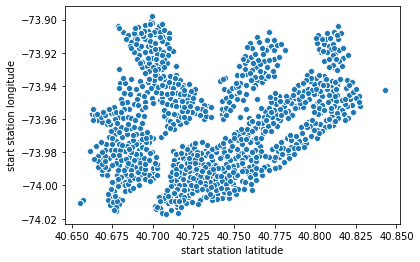

In [222]:
sns.scatterplot(x = df['start station latitude'], y = df['start station longitude'])

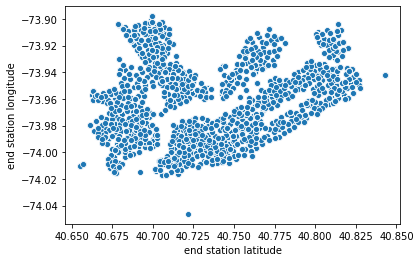

In [223]:
sns.scatterplot(x = df['end station latitude'], y = df['end station longitude'])

In [224]:
df.groupby('start station name').count()

,tripduration,starttime,stoptime,start station id,start station latitude,start station longitude,end station id,end station name,end station latitude,end station longitude,bikeid,usertype,birth year,gender
start station name,,,,,,,,,,,,,,
1 Ave & E 110 St,82,82,82,82,82,82,82,82,82,82,82,82,82,82
1 Ave & E 16 St,164,164,164,164,164,164,164,164,164,164,164,164,164,164
1 Ave & E 18 St,122,122,122,122,122,122,122,122,122,122,122,122,122,122
1 Ave & E 30 St,144,144,144,144,144,144,144,144,144,144,144,144,144,144
1 Ave & E 44 St,74,74,74,74,74,74,74,74,74,74,74,74,74,74
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
Woodward Ave & Harman St,14,14,14,14,14,14,14,14,14,14,14,14,14,14
Wyckoff Av & Jefferson St,11,11,11,11,11,11,11,11,11,11,11,11,11,11
Wyckoff Av & Stanhope St,30,30,30,30,30,30,30,30,30,30,30,30,30,30


In [225]:
df.groupby('end station name')['tripduration'].count().sort_values(ascending = False)

end station name
1 Ave & E 68 St                 384
12 Ave & W 40 St                340
Pier 40 - Hudson River Park     332
West St & Chambers St           306
E 17 St & Broadway              305
                               ... 
Bushwick Ave & Furman Ave         1
Frost St & Debevoise Ave          1
E 138 St & Canal St W             1
OLD Southern Blvd & E 142 St      1
Soissons Landing                  1
Name: tripduration, Length: 956, dtype: int64

In [226]:
df.groupby('start station name')['tripduration'].count().sort_values(ascending = False)

start station name
1 Ave & E 68 St                  384
Pier 40 - Hudson River Park      333
12 Ave & W 40 St                 333
West St & Chambers St            314
E 17 St & Broadway               295
                                ... 
Linden St & Knickerbocker Ave      2
Columbia St & Lorraine St          2
OLD Southern Blvd & E 142 St       1
Walnut Ave & E 136 St              1
E 138 St & Canal St W              1
Name: tripduration, Length: 955, dtype: int64

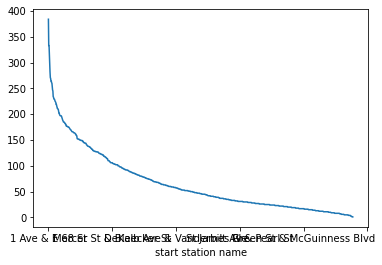

In [227]:
df.groupby('start station name')['tripduration'].count().sort_values(ascending = False).plot()

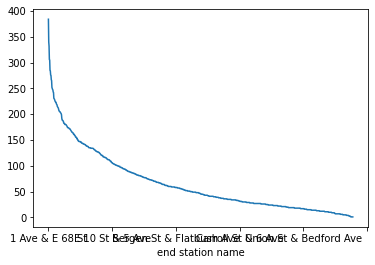

In [228]:
df.groupby('end station name')['tripduration'].count().sort_values(ascending = False).plot()

In [229]:
df.groupby(['start station name', 'end station name'])['tripduration'].count().sort_values(ascending= False)

start station name               end station name               
West Drive & Prospect Park West  West Drive & Prospect Park West    61
Brooklyn Bridge Park - Pier 2    Brooklyn Bridge Park - Pier 2      47
12 Ave & W 125 St                12 Ave & W 125 St                  34
Central Park S & 6 Ave           Central Park S & 6 Ave             28
5 Ave & E 73 St                  5 Ave & E 73 St                    28
                                                                    ..
Lafayette St & E 8 St            Pike St & E Broadway                1
                                 Riverside Dr & W 91 St              1
                                 St Marks Pl & 1 Ave                 1
                                 St Marks Pl & 2 Ave                 1
E 91 St & Park Ave               Christopher St & Greenwich St       1
Name: tripduration, Length: 42621, dtype: int64

In [230]:
temp = df[['starttime', 'stoptime', 'start station latitude','start station longitude','end station latitude','end station longitude' ]]

In [232]:
# geo_s = []
# geo_e = []
# for i in range(len(temp)):
#     if i%100 == 0: print(i)
#     geo_s.append([temp.loc[i]['start station latitude'], temp.loc[i]['start station longitude']])
#     geo_e.append([temp.loc[i]['end station latitude'], temp.loc[i]['end station longitude']])

### Data Visualization

In [39]:
# temp['starttime'] = temp['starttime'].dt.strftime('%Y-%m-%d %H:%M:%S')

In [40]:
# temp['stoptime'] = temp['stoptime'].dt.strftime('%Y-%m-%d %H:%M:%S')

In [233]:
temp

,starttime,stoptime,start station latitude,start station longitude,end station latitude,end station longitude
0,2020-07-01T00:00:01.302,2020-07-01T00:05:42.565,40.735367,-73.987974,40.733812,-73.980544
1,2020-07-01T00:00:01.362,2020-07-01T00:05:22.949,40.735367,-73.987974,40.733812,-73.980544
2,2020-07-01T00:00:06.629,2020-07-01T00:45:17.341,40.717548,-74.013221,40.743349,-74.006818
3,2020-07-01T00:00:13.022,2020-07-01T00:44:58.864,40.717548,-74.013221,40.743349,-74.006818
4,2020-07-01T00:00:13.466,2020-07-01T00:03:24.623,40.748000,-73.946093,40.749660,-73.952100
...,...,...,...,...,...,...
63401,2020-07-01T23:59:14.810,2020-07-02T00:42:39.641,40.805159,-73.954692,40.739448,-74.005070
63402,2020-07-01T23:59:31.484,2020-07-02T00:24:43.816,40.717548,-74.013221,40.771771,-73.990625
63403,2020-07-01T23:59:41.007,2020-07-02T00:36:37.743,40.692000,-73.926170,40.711731,-73.991930
63404,2020-07-01T23:59:49.088,2020-07-02T00:27:00.728,40.695734,-73.971297,40.702772,-73.993836


In [234]:
def create_geojson_features(df):
    features = []
    
    for _, row in df.iterrows():
        start_point = [row['start station longitude'],row['start station latitude']]
        end_point = [row['end station longitude'],row['end station latitude']]
        feature = {
            'type': 'Feature',
            'geometry': {
                'type':'LineString', #'Point', 
                'coordinates': [start_point, end_point]
            },
            'docstring': 'ok',
            'properties': {
                'times': [row['starttime'], row['starttime']],
                'style': {'color' : '#b2d678'}
#                 {,
#                           'weight': 5
#                          }
                
#                 'icon': 'circle',
#                 'iconstyle':{
#                     'fillColor': 'red',
#                     'fillOpacity': 0,
#                     'stroke': 'true',
#                     'radius': 5
#                 }
            }
        }
        features.append(feature)
    return features

In [235]:
start_geojson = create_geojson_features(temp) 
start_geojson[0]

{'type': 'Feature',
 'geometry': {'type': 'LineString',
  'coordinates': [[-73.98797392845155, 40.735367055605394],
   [-73.9805442094803, 40.73381219196632]]},
 'docstring': 'ok',
 'properties': {'times': ['2020-07-01T00:00:01.302',
   '2020-07-01T00:00:01.302'],
  'style': {'color': '#b2d678'}}}

In [239]:
m = folium.Map(
    location=[40.7504566,-73.9202403],
    zoom_start=12,
    zoom_control=False,
    tiles = "cartodbdark_matter"
)


plugins.TimestampedGeoJson(start_geojson
                           ,period = 'PT1S'
                           ,duration = 'PT5S'
                           ,add_last_point=False
                           ,transition_time = 10).add_to(m)

m

In [47]:
# m = folium.Map(
#     location=[40.7504566,-73.9202403],
#     zoom_start=12,
#     zoom_control=False,
#     tiles = "CartoDB Positron"
# )

In [ ]:
m = folium.Map(
    location=[40.7504566,-73.9202403],
    zoom_start=12,
    zoom_control=False,
    tiles = "CartoDB Positron"
)

lines= []
for i in range(len(temp)):
    if i%300 == 0: print(i)
    p1 = [temp.loc[i]['start station latitude'], temp.loc[i]['start station longitude']]
    p2 = [temp.loc[i]['end station latitude'], temp.loc[i]['end station longitude']]
    hmp = {}
    hmp['coordinates'] = [p1, p2]
    hmp['dates'] = [temp.loc[i]['starttime'],temp.loc[i]['stoptime']]
    hmp['color'] = 'red'
    lines.append(hmp)

features = [
    {
        'type': 'Feature',
        'geometry': {
            'type': 'Point', #'LineString',
            'coordinates': line['coordinates'][0],
        },
        'properties': {
            'times': line['dates'],
            'style': {
                'color': line['color'],
                'weight': 5 #line['weight'] if 'weight' in line else 5
            }
        }
    }
    for line in lines
]

# print(features)

plugins.TimestampedGeoJson(
 features
, period='PT1M'
, add_last_point=True).add_to(m)

# # m.save(os.path.join('results', 'Plugins_6.html'))




m

In [ ]:
###################################################

In [180]:
for p in geo_s:
    folium.Circle(
        radius=5,
        location=[p[0], p[1]],
        color='#73aac9',
        fill=False,
    ).add_to(m)

In [181]:
for p in geo_e:
    folium.Circle(
        radius=5,
        location=[p[0], p[1]],
        color='#cf907a',
        fill=False,
    ).add_to(m)

In [ ]:
m

In [182]:
for i in range(len(temp)):
    if i%300 == 0: print(i)
    p1 = [temp.loc[i]['start station latitude'], temp.loc[i]['start station longitude']]
    p2 = [temp.loc[i]['end station latitude'], temp.loc[i]['end station longitude']]
    
    folium.PolyLine([p1,p2], color="#7ab0cf", weight=2.5, opacity=0.2).add_to(m)

0
300
600


In [151]:
# for p in geo_s:
#     folium.Marker(
#         location=[p[0],p[1]]
#     ).add_to(m)


In [ ]:
# m